In [26]:
import pandas as pd
import numpy as np
data=pd.read_csv("problem3_covid2.csv")

In [27]:
data.head()

,location,date,new_cases
0,Austria,2021-01-01,2096.0
1,Austria,2021-01-02,1391.0
2,Austria,2021-01-03,1466.0
3,Austria,2021-01-04,1642.0
4,Austria,2021-01-05,2311.0


3-(1) 데이터는 일자별 각 나라의 일일 확진자수를 나타낸다. 각 나라의 일자별 누적확진자 수를 나타내는 데이터 프레임을 생성하라

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11895 entries, 0 to 11894
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   11895 non-null  object 
 1   date       11895 non-null  object 
 2   new_cases  11662 non-null  float64
dtypes: float64(1), object(2)
memory usage: 278.9+ KB


In [29]:
data['date']=pd.to_datetime(data['date'])

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11895 entries, 0 to 11894
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   location   11895 non-null  object        
 1   date       11895 non-null  datetime64[ns]
 2   new_cases  11662 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 278.9+ KB


In [31]:
target=data.groupby(['location', 'date']).sum().groupby(level=0).cumsum()

In [32]:
target.columns=['cumulative sum']
target=target.reset_index()
target

,location,date,cumulative sum
0,Austria,2021-01-01,2096.0
1,Austria,2021-01-02,3487.0
2,Austria,2021-01-03,4953.0
3,Austria,2021-01-04,6595.0
4,Austria,2021-01-05,8906.0
...,...,...,...
11890,Vanuatu,2021-10-28,5.0
11891,Vanuatu,2021-10-29,5.0
11892,Vanuatu,2021-10-30,5.0
11893,Vanuatu,2021-10-31,5.0


3-(2) 1에서 구한 데이터를 각 나라별로 acf값을 구하고(lag는 50개까지 구하고 첫번째 값을 제외하라) 국가를 기준으로 유클리디안 거리를 기준으로 클러스터링을 진행 후 계층적 군집 분석을 위해 덴드로그램 작성하라

In [37]:
from scipy.spatial import distance
import statsmodels.api as sm

name=[]
name
for location in target.location.unique():
    
    v=sm.tsa.stattools.acf(target[target['location']==location]['cumulative sum'], nlags=50, fft=False)
    name.append([location]+list(v[1:]))
v=pd.DataFrame(name)
v

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,Austria,0.986910,0.973895,0.961027,0.948347,0.935884,0.923563,0.911388,0.899286,0.887245,...,0.520420,0.509183,0.497960,0.486745,0.475543,0.464370,0.453267,0.442242,0.431334,0.420483
1,Bangladesh,0.993958,0.987757,0.981401,0.974895,0.968240,0.961439,0.954491,0.947394,0.940150,...,0.644404,0.633643,0.622824,0.611950,0.601019,0.590035,0.579005,0.567934,0.556820,0.545668
2,Bhutan,0.994586,0.989147,0.983590,0.977976,0.972226,0.966459,0.960636,0.954678,0.948797,...,0.700749,0.691193,0.681564,0.671847,0.662047,0.652165,0.642174,0.632091,0.621911,0.611642
3,Chile,0.992455,0.984846,0.977165,0.969415,0.961598,0.953711,0.945768,0.937768,0.929723,...,0.647890,0.638302,0.628672,0.618999,0.609285,0.599527,0.589710,0.579831,0.569911,0.559947
4,Colombia,0.993340,0.986596,0.979760,0.972838,0.965857,0.958820,0.951729,0.944587,0.937384,...,0.679471,0.670459,0.661382,0.652238,0.643029,0.633751,0.624406,0.615000,0.605532,0.596002
5,Costa Rica,0.991810,0.983535,0.975153,0.966751,0.958285,0.949791,0.941242,0.932571,0.923824,...,0.618037,0.608217,0.598396,0.588729,0.578986,0.569182,0.559436,0.549766,0.540130,0.530700
6,Dominica,0.985394,0.970488,0.955557,0.940502,0.925415,0.910434,0.894982,0.879564,0.864024,...,0.340212,0.325323,0.310219,0.295901,0.281439,0.266802,0.251947,0.237210,0.222798,0.210603
7,Dominican Republic,0.988748,0.977470,0.966112,0.954885,0.943612,0.932319,0.921053,0.909788,0.898637,...,0.590488,0.582152,0.573867,0.565637,0.557424,0.549236,0.541039,0.532845,0.524705,0.516596
8,Eswatini,0.991957,0.983655,0.975124,0.966366,0.957380,0.948162,0.938702,0.928984,0.919027,...,0.531118,0.517882,0.504646,0.491363,0.478050,0.464713,0.451352,0.438012,0.424679,0.411359
9,Ethiopia,0.990660,0.981181,0.971582,0.961856,0.952011,0.942059,0.931995,0.921820,0.911507,...,0.542607,0.530834,0.519123,0.507372,0.495701,0.484100,0.472584,0.461160,0.449834,0.438604


In [38]:
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
v
data=v.set_index(0)

In [39]:
data

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,,,,,,,,,,,,,,,,,,,,,
Austria,0.986910,0.973895,0.961027,0.948347,0.935884,0.923563,0.911388,0.899286,0.887245,0.875277,...,0.520420,0.509183,0.497960,0.486745,0.475543,0.464370,0.453267,0.442242,0.431334,0.420483
Bangladesh,0.993958,0.987757,0.981401,0.974895,0.968240,0.961439,0.954491,0.947394,0.940150,0.932765,...,0.644404,0.633643,0.622824,0.611950,0.601019,0.590035,0.579005,0.567934,0.556820,0.545668
Bhutan,0.994586,0.989147,0.983590,0.977976,0.972226,0.966459,0.960636,0.954678,0.948797,0.942796,...,0.700749,0.691193,0.681564,0.671847,0.662047,0.652165,0.642174,0.632091,0.621911,0.611642
Chile,0.992455,0.984846,0.977165,0.969415,0.961598,0.953711,0.945768,0.937768,0.929723,0.921635,...,0.647890,0.638302,0.628672,0.618999,0.609285,0.599527,0.589710,0.579831,0.569911,0.559947
Colombia,0.993340,0.986596,0.979760,0.972838,0.965857,0.958820,0.951729,0.944587,0.937384,0.930121,...,0.679471,0.670459,0.661382,0.652238,0.643029,0.633751,0.624406,0.615000,0.605532,0.596002
Costa Rica,0.991810,0.983535,0.975153,0.966751,0.958285,0.949791,0.941242,0.932571,0.923824,0.914972,...,0.618037,0.608217,0.598396,0.588729,0.578986,0.569182,0.559436,0.549766,0.540130,0.530700
Dominica,0.985394,0.970488,0.955557,0.940502,0.925415,0.910434,0.894982,0.879564,0.864024,0.848215,...,0.340212,0.325323,0.310219,0.295901,0.281439,0.266802,0.251947,0.237210,0.222798,0.210603
Dominican Republic,0.988748,0.977470,0.966112,0.954885,0.943612,0.932319,0.921053,0.909788,0.898637,0.887554,...,0.590488,0.582152,0.573867,0.565637,0.557424,0.549236,0.541039,0.532845,0.524705,0.516596
Eswatini,0.991957,0.983655,0.975124,0.966366,0.957380,0.948162,0.938702,0.928984,0.919027,0.908874,...,0.531118,0.517882,0.504646,0.491363,0.478050,0.464713,0.451352,0.438012,0.424679,0.411359


In [40]:
label=np.array(data.index)
label

array(['Austria', 'Bangladesh', 'Bhutan', 'Chile', 'Colombia',
       'Costa Rica', 'Dominica', 'Dominican Republic', 'Eswatini',
       'Ethiopia', 'Faeroe Islands', 'Ghana', 'Greece', 'Haiti', 'Kenya',
       'Kosovo', 'Kyrgyzstan', 'Libya', 'Maldives', 'Mauritius',
       'Moldova', 'Montenegro', 'Morocco', 'Myanmar', 'Namibia',
       'Nicaragua', 'Nigeria', 'North Macedonia', 'Norway', 'Palau',
       'Poland', 'Portugal', 'Russia', 'Saint Pierre and Miquelon',
       'Slovenia', 'Solomon Islands', 'Tunisia', 'Uruguay', 'Vanuatu'],
      dtype=object)

In [41]:
datav=data.values

In [42]:
datav

array([[0.98691031, 0.97389452, 0.96102715, ..., 0.44224238, 0.43133364,
        0.42048272],
       [0.99395758, 0.98775656, 0.98140141, ..., 0.56793368, 0.55682019,
        0.54566836],
       [0.9945855 , 0.98914673, 0.98359013, ..., 0.63209116, 0.62191129,
        0.61164167],
       ...,
       [0.99278756, 0.98545325, 0.97801069, ..., 0.57358094, 0.56334682,
        0.55328713],
       [0.99420047, 0.98827756, 0.98223393, ..., 0.60654453, 0.59615462,
        0.58569491],
       [0.97786429, 0.95572857, 0.93359286, ..., 0.39463629, 0.37968131,
        0.36472632]])

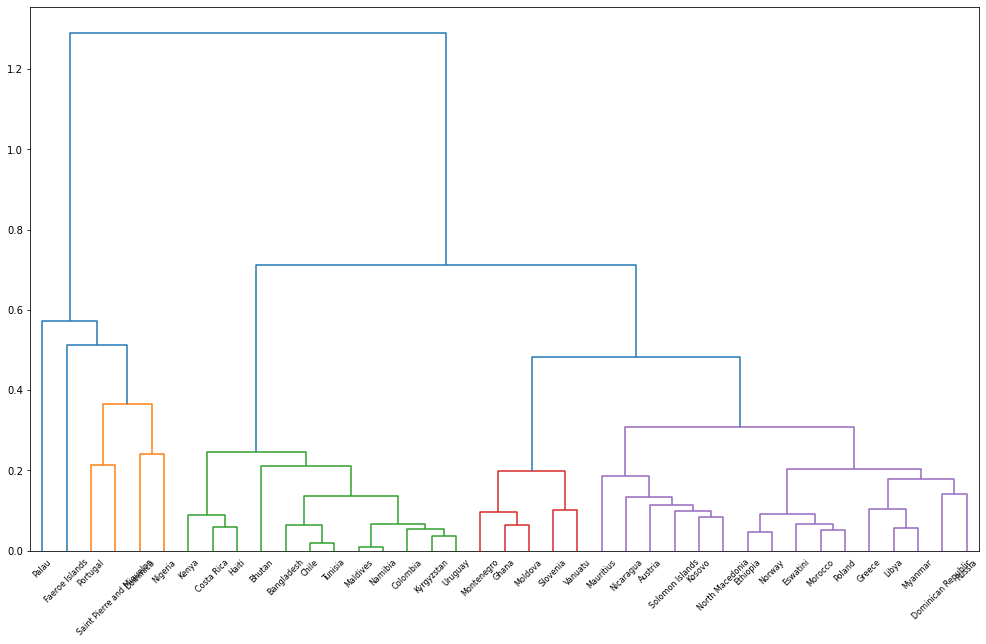

In [45]:
fig=plt.figure(figsize=(17,10))
ax3=fig.add_subplot(1,1,1)
dend3=sch.linkage(datav, method='average', metric='euclidean')
cutoff=0.3*max(dend3[:,2])
dend_res3=sch.dendrogram(dend3, color_threshold=cutoff)
ax3.set_xticklabels(label[dend_res3['leaves']], minor=False)

plt.show()